In [1]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from torch.utils.data.dataloader import DataLoader
from torchvision.utils import make_grid
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torchvision.transforms import Compose
from torchvision import transforms
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support
import json
import math
import random

from utils_data import *
from utils_train import *
from utils_test import *
from utils_hparams import *

import matplotlib

## Data load

In [2]:
data_dir =   '/home/projects/bagon/ingap/cifar10_analysis/cifar10_analysis/cifar10_data/cifar10'
train_ds, test_ds = chose_preprocess("No",data_dir)

Files already downloaded and verified
Files already downloaded and verified


## Data classes

In [3]:
print(train_ds.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


## Number of samples in class

In [4]:
airplane_files = os.listdir(data_dir + "/train/airplane")
print('No. of training examples for airplanes:', len(airplane_files))

No. of training examples for airplanes: 5000


In [5]:
airplane_files_test = os.listdir(data_dir + "/test/airplane")
print('No. of test examples for airplanes TEST:', len(airplane_files_test))

No. of test examples for airplanes TEST: 1000


## Size of images

In [6]:
img, label = train_ds[0]
print(img.shape, label)

torch.Size([3, 32, 32]) 6


In [7]:
train_ds.classes[label]

'frog'

In [8]:
img.size()

torch.Size([3, 32, 32])

## Images of training set

To disable matplotlib.use('Agg')  # Use Agg backend which imported from the modules

In [9]:
import matplotlib.pyplot as plt
plt.switch_backend('module://ipykernel.pylab.backend_inline')

# '#ffffff' => representing a color in the RGB (Red, Green, Blue) color system
matplotlib.rcParams['figure.facecolor'] = '#ffffff'

airplane


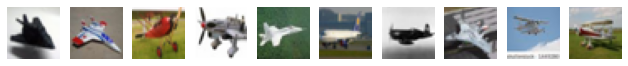

automobile


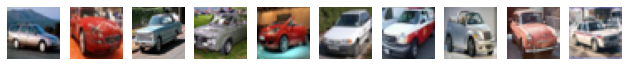

bird


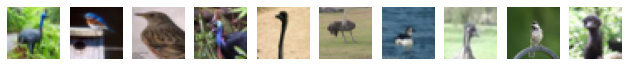

cat


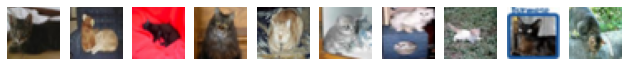

deer


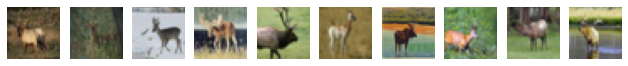

dog


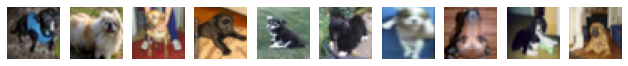

frog


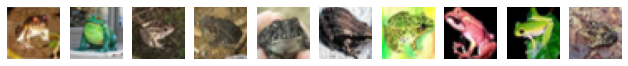

horse


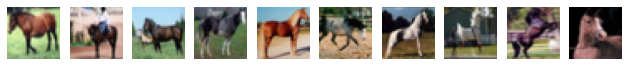

ship


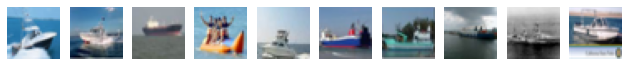

truck


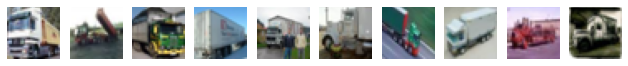

In [10]:
for i in range(10):
    display_images_for_label(train_ds,i)

## Images of test set

airplane


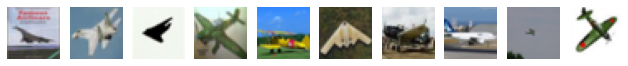

automobile


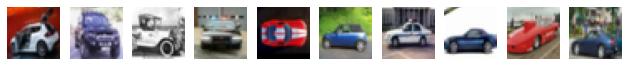

bird


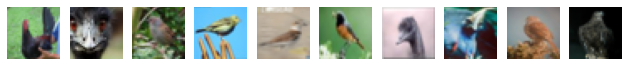

cat


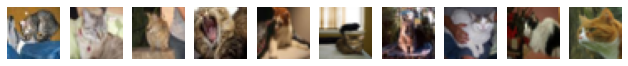

deer


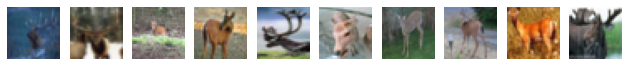

dog


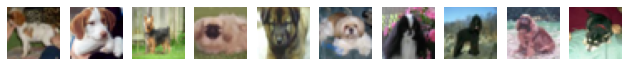

frog


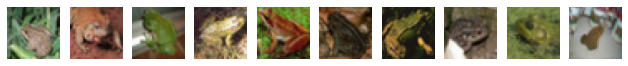

horse


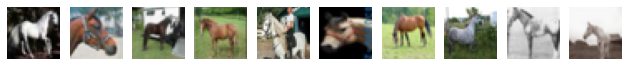

ship


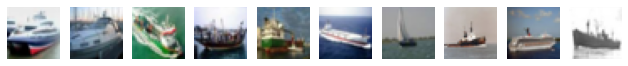

truck


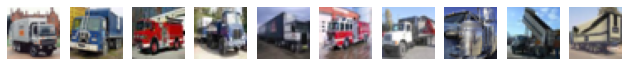

In [11]:
for i in range(10):
    display_images_for_label(test_ds,i)

## Augmentation => Kornia

Define Kornia augmentations

In [12]:
# ColorJiggle
colorjiggle = ColorJiggle(0.3, 0.3, 0.3, 0.3, same_on_batch=False, keepdim=False, p=1.0)

# RandomAffine
randomaffine = RandomAffine((-15.0, 5.0),(0.3, 1.0),(0.4, 1.3),0.5,resample="nearest",padding_mode="reflection",align_corners=True,same_on_batch=False,keepdim=False,p=1.0,)

# RandomVerticalFlip
randomverticalflip = RandomVerticalFlip(same_on_batch=False, keepdim=False, p=0.6, p_batch=1.0)

# RandomHorizontalFlip
randomhorizontalflip = RandomHorizontalFlip(same_on_batch=False, keepdim=False, p=0.7)

# RandomRotate
randomrotation = RandomRotation(15.0, "nearest", align_corners=True, same_on_batch=False, keepdim=False, p=1.0)

# RandomCrop
randomcrop = RandomCrop((150, 150),10,True,1,"constant","nearest",cropping_mode="resample",same_on_batch=False,align_corners=True,keepdim=False,p=1.0,)

# RandomErasing
randomerasing = RandomErasing(scale=(0.02, 0.33), ratio=(0.3, 3.3), value=1, same_on_batch=False, keepdim=False, p=1.0)

# RandomGrayscale
randomgrayscale = RandomGrayscale(same_on_batch=False, keepdim=False, p=1.0)

# RandomResizedCrop
randomresizedcrop = RandomResizedCrop((200, 200),(0.4, 1.0),(2.0, 2.0),"nearest",align_corners=True,cropping_mode="resample",same_on_batch=False,keepdim=False,p=1.0,)

# CenterCrop
centercrop = CenterCrop(25, resample="nearest", cropping_mode="resample", align_corners=True, keepdim=False, p=1.0)

Reference image

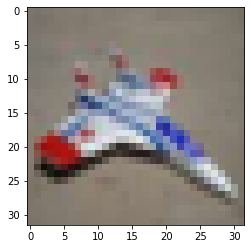

In [13]:
img, label = train_ds[30]
img_reference = img.permute(1, 2, 0).numpy()
img_reference.shape
plt.imshow(img_reference)

Reference image & Augmentations

colorjiggle


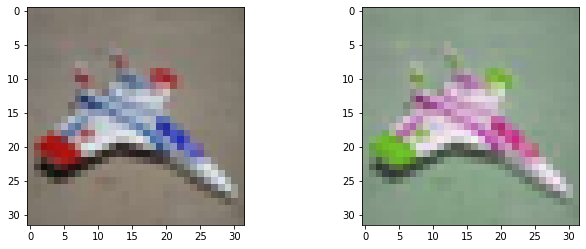

In [14]:
print('colorjiggle')
visual_kornia(colorjiggle,img_reference, img)

randomaffine


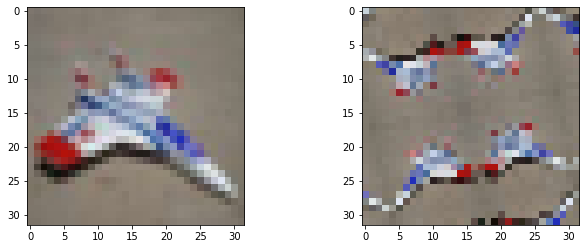

In [15]:
print('randomaffine')
visual_kornia(randomaffine,img_reference,img)

randomverticalflip


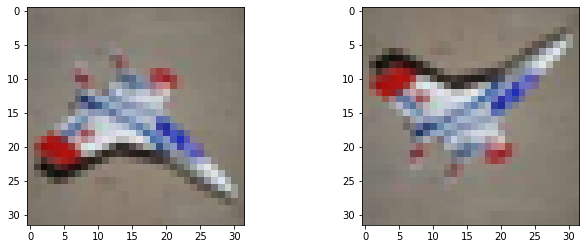

In [16]:
print('randomverticalflip')
visual_kornia(randomverticalflip,img_reference,img)

randomhorizontalflip


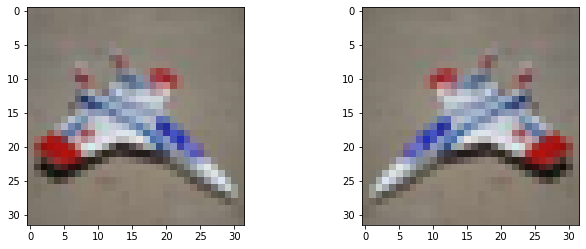

In [17]:
print('randomhorizontalflip')
visual_kornia(randomhorizontalflip,img_reference,img)

randomrotation


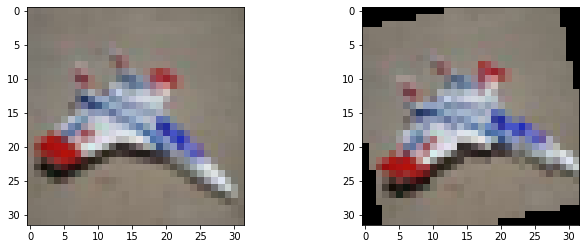

In [18]:
print('randomrotation')
visual_kornia(randomrotation,img_reference,img)

randomcrop


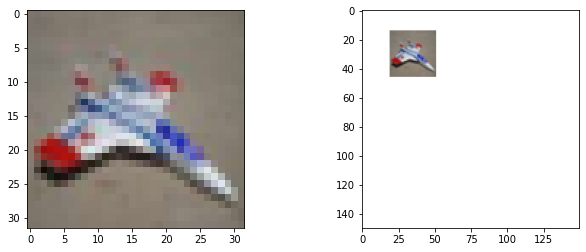

In [19]:
print('randomcrop')
visual_kornia(randomcrop,img_reference,img)

randomerasing


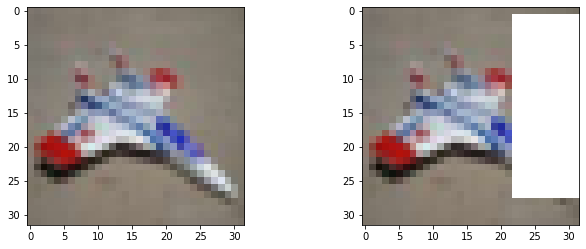

In [20]:
print('randomerasing')
visual_kornia(randomerasing,img_reference,img)

randomgrayscale


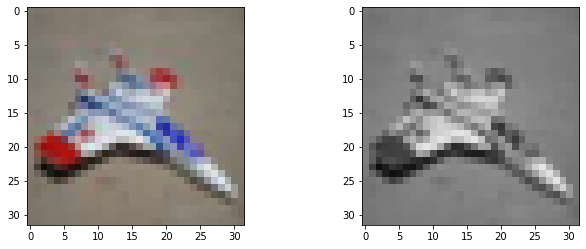

In [21]:
print('randomgrayscale')
visual_kornia(randomgrayscale,img_reference,img)

randomresizedcrop


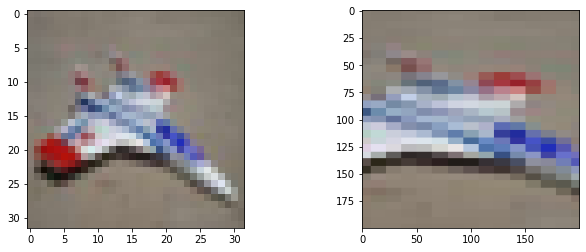

In [22]:
print('randomresizedcrop')
visual_kornia(randomresizedcrop,img_reference,img)

centercrop


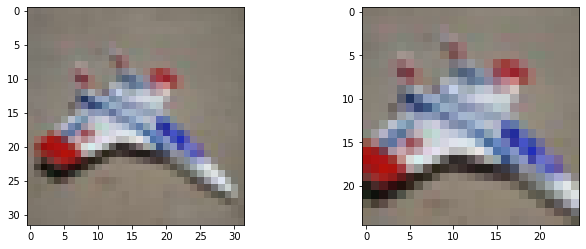

In [23]:
print('centercrop')
visual_kornia(centercrop,img_reference,img)

## Train/Validation random split

In [24]:
val_size = 5000
train_size = len(train_ds) - val_size
train_size

45000

In [25]:
train_ds, val_ds = random_split(train_ds, [train_size, val_size])
len(train_ds), len(val_ds)

(45000, 5000)

## DataLoaders

In [26]:
batch_size=128

In [27]:
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)

In [28]:
val_dl = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)

In [29]:
test_dl = DataLoader(test_ds, batch_size*2, )

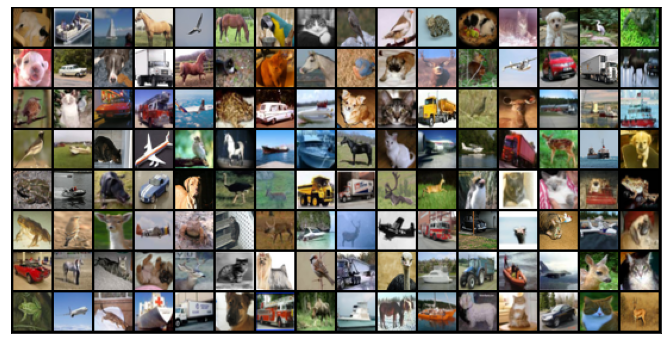

In [30]:
show_batch(train_dl)

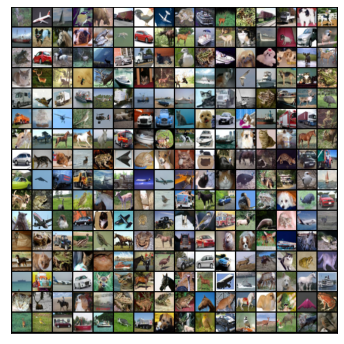

In [31]:
show_batch(val_dl)

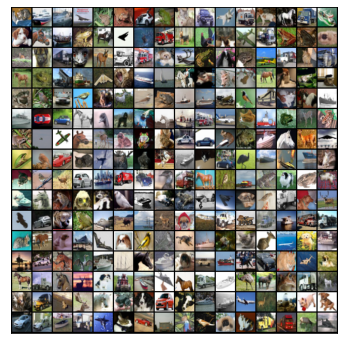

In [32]:
show_batch(test_dl)